# Scipy

Author: Julian Lißner<br>
For questions and feedback write a mail to: [lissner@mib.uni-stuttgart.de](mailto:lissner@mib.uni-stuttgart.de)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append( 'submodules/')
import display_functions as plot

# Scipy subpackages

- `scipy` contains extremely high level functions
- generally not imported as `import scipy as alias`
- `from scipy import package as alias`
- available packages (directly copied from their [official website](https://docs.scipy.org/doc/scipy/reference/) )
    - Special functions (scipy.special)
    - Integration (scipy.integrate)
    - Optimization (scipy.optimize)
    - Interpolation (scipy.interpolate)
    - Fourier Transforms (scipy.fft)
    - Signal Processing (scipy.signal)
    - Linear Algebra (scipy.linalg)
    - Sparse eigenvalue problems with ARPACK
    - Compressed Sparse Graph Routines (scipy.sparse.csgraph)
    - Spatial data structures and algorithms (scipy.spatial)
    - Statistics (scipy.stats)
    - Multidimensional image processing (scipy.ndimage)
    - File IO (scipy.io)

$\quad\blacktriangleright$ `from scipy import stats as distributions`

----------

## Regression

In [2]:
from scipy import stats

- a simple example, linear regression
- one function call


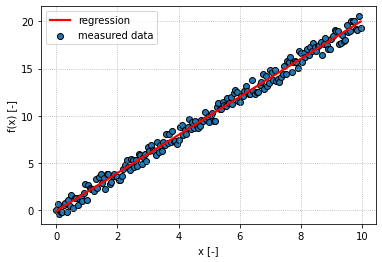

In [3]:
x = np.arange( 0, 10, 0.05 )
noise = np.random.uniform( low=-1.0, high=1.0, size=x.shape) 
data = 2*x + noise

a, b = stats.linregress( x, data)[:2]
regression = a*x+b

fig, ax = plt.subplots()
ax.scatter( x, data, label='measured data', edgecolor='k' )
ax.plot( x, regression, color='red', lw=2.2, label='regression' )

ax.set_xlabel( 'x [-]')
ax.set_ylabel( 'f(x) [-]')
ax.legend()
ax.grid( ls=':', color='#AAAAAA')

---------------------------
## Distributions

- distribution object to call methods on
- objects do not store parameters, they only return values
- call methods on objects

In [4]:
n = 200
x = np.random.randn( 200 )
distribution = stats.norm
parameters = distribution.fit( x)
help( distribution.fit)

Help on method fit in module scipy.stats._continuous_distns:

fit(data, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Return MLEs for shape (if applicable), location, and scale
    parameters from data.
    
    MLE stands for Maximum Likelihood Estimate.  Starting estimates for
    the fit are given by input arguments; for any arguments not provided
    with starting estimates, ``self._fitstart(data)`` is called to generate
    such.
    
    One can hold some parameters fixed to specific values by passing in
    keyword arguments ``f0``, ``f1``, ..., ``fn`` (for shape parameters)
    and ``floc`` and ``fscale`` (for location and scale parameters,
    respectively).
    
    Parameters
    ----------
    data : array_like
        Data to use in calculating the MLEs.
    arg1, arg2, arg3,... : floats, optional
        Starting value(s) for any shape-characterizing arguments (those not
        provided will be determined by a call to ``_fitstart(data)``).
      

In [5]:
parameters = list(parameters)

expectation = x.mean()
std = np.sqrt( 1/n * np.sum( (x-x.mean())**2 ) )
print( 'scipy estimators\t {:.5f}, {:.5f}'.format( *parameters) )
print( 'computed estimators\t {:.5f}, {:.5f}'.format(  expectation, std) )
print( 'numpy variance: {:.5f}'.format( x.std()) )

scipy estimators	 0.17954, 1.01264
computed estimators	 0.17954, 1.01264
numpy variance: 1.01264


- scipy like numpy return the biased estimators
- the stochastic measure can be corrected to be the unbiased counterpart

In [6]:
std_unbiased = std * np.sqrt( n/(n-1) ) 
print( 'unbiased standard deviation {:.5f}'.format( std_unbiased ) )

unbiased standard deviation 1.01519


In [7]:
help(distribution.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



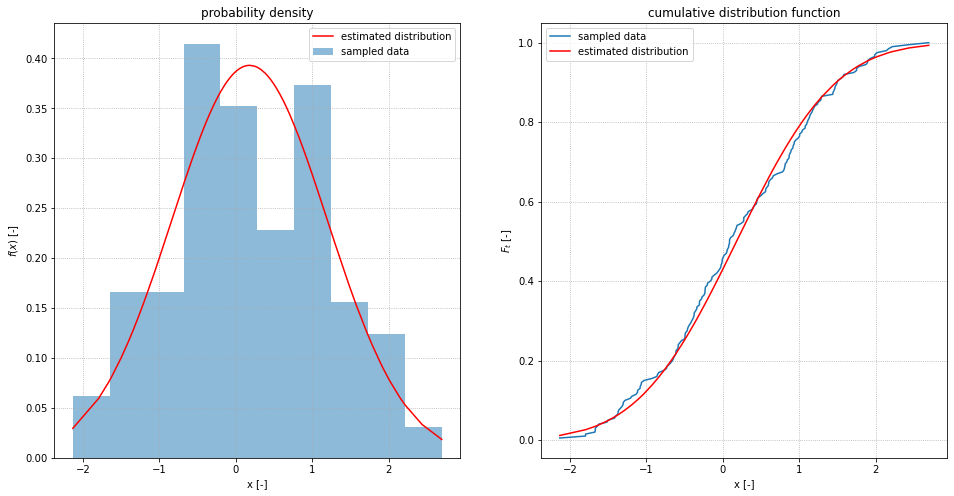

In [8]:
parameters[1] = std_unbiased
plot_x = np.sort( x)
fig, axes = plt.subplots( 1, 2, figsize=(16,8) )
x_pdf, y_pdf, width = plot.underlying_distribution( x)
axes[0].bar( x_pdf, y_pdf, width=width, alpha=0.5, label='sampled data'  )
axes[0].plot( plot_x, distribution.pdf( plot_x, *parameters), color='red', label='estimated distribution'  )
axes[1].plot( *plot.cumulative_distribution_function( x), label='sampled data' )
axes[1].plot( plot_x, distribution.cdf( plot_x, *parameters), color='red', label='estimated distribution')

titles = [ 'probability density', 'cumulative distribution function']
for ax in axes:
    ax.set_title( titles.pop(0))
    ax.set_xlabel( 'x [-]' )
    ax.legend()
    ax.grid( ls=':', color='#AAAAAA')
axes[0].set_ylabel( r'$f(x)$ [-]')
axes[1].set_ylabel( r'$F_t$ [-]')
plt.show()